## I am analyzing the Tmdb movie dataset in this project

## The questions posed for EDA of this dataset are as follows:

1. Which Genre movies are most popular througout the dataset
2. Which year has the highest number of movie releases?
3. What is the Budget, Revenue, Profit trend throughout the years?
4. Which are the top 10 movies based on maximum vote average, most vote count and maximum popularity


## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Wrangling

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Cleaning

In [6]:
#Remove all the columns not needed for the EDA.

df_movies = df.drop(['id', 'cast', 'homepage', 'tagline', 'overview', 'production_companies'], axis=1)

In [7]:
df_movies.shape

(10866, 15)

In [8]:
#New Dataset created after deleting columns

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
keywords          9373 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


In [9]:
#Analysing "Keywords" column

df_movies['keywords'].head()

#Keywords column is not needed for EDA. Drop the column

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [10]:
df_movies = df_movies.drop(['keywords'], axis=1)

In [11]:
#Counting the number of null values in each column. 
#imdb_id, director, genres columns have null values which need to be removed to handle missing values.

df_movies.isna().sum()

imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [12]:
df_movies.shape

(10866, 14)

In [13]:
df_movies = df_movies.dropna(axis=0, how='any')

In [14]:
#Rows with any null values is dropped.

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10796 entries, 0 to 10865
Data columns (total 14 columns):
imdb_id           10796 non-null object
popularity        10796 non-null float64
budget            10796 non-null int64
revenue           10796 non-null int64
original_title    10796 non-null object
director          10796 non-null object
runtime           10796 non-null int64
genres            10796 non-null object
release_date      10796 non-null object
vote_count        10796 non-null int64
vote_average      10796 non-null float64
release_year      10796 non-null int64
budget_adj        10796 non-null float64
revenue_adj       10796 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [15]:
df_movies.head()

#Here you can clearly see that there are two columns for budget & revenue.
#The 'budget_adj' & 'revenue_adj' provide realistic expenses on each entry, so I am going to use those two columns to calculate the profits.


,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
df_movies = df_movies.drop(['budget' , 'revenue'], axis=1)

df_movies.info()

#Data is now cleaned.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10796 entries, 0 to 10865
Data columns (total 12 columns):
imdb_id           10796 non-null object
popularity        10796 non-null float64
original_title    10796 non-null object
director          10796 non-null object
runtime           10796 non-null int64
genres            10796 non-null object
release_date      10796 non-null object
vote_count        10796 non-null int64
vote_average      10796 non-null float64
release_year      10796 non-null int64
budget_adj        10796 non-null float64
revenue_adj       10796 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


## Question 1: Which Genre movies are most popular throughout the dataset?

In [17]:
genre_labels = set()
for s in df_movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
    
genre_labels

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [18]:
def count_word(df, ref_col, list):
    keyword_count = dict()
    for s in list: keyword_count[s] = 0
    for list_keywords in df[ref_col].str.split('|'):          
        for s in [s for s in list_keywords if s in list]: 
            if pd.notnull(s): keyword_count[s] += 1
        
    return keyword_count

In [19]:
keyword_occurences = count_word(df_movies, 'genres', genre_labels)
keyword_occurences

{'Comedy': 3782,
 'Adventure': 1464,
 'Fantasy': 909,
 'Science Fiction': 1220,
 'Mystery': 809,
 'Crime': 1354,
 'War': 270,
 'Horror': 1636,
 'Documentary': 509,
 'Action': 2374,
 'Family': 1222,
 'History': 332,
 'TV Movie': 162,
 'Music': 402,
 'Animation': 690,
 'Thriller': 2905,
 'Drama': 4753,
 'Western': 164,
 'Foreign': 185,
 'Romance': 1708}

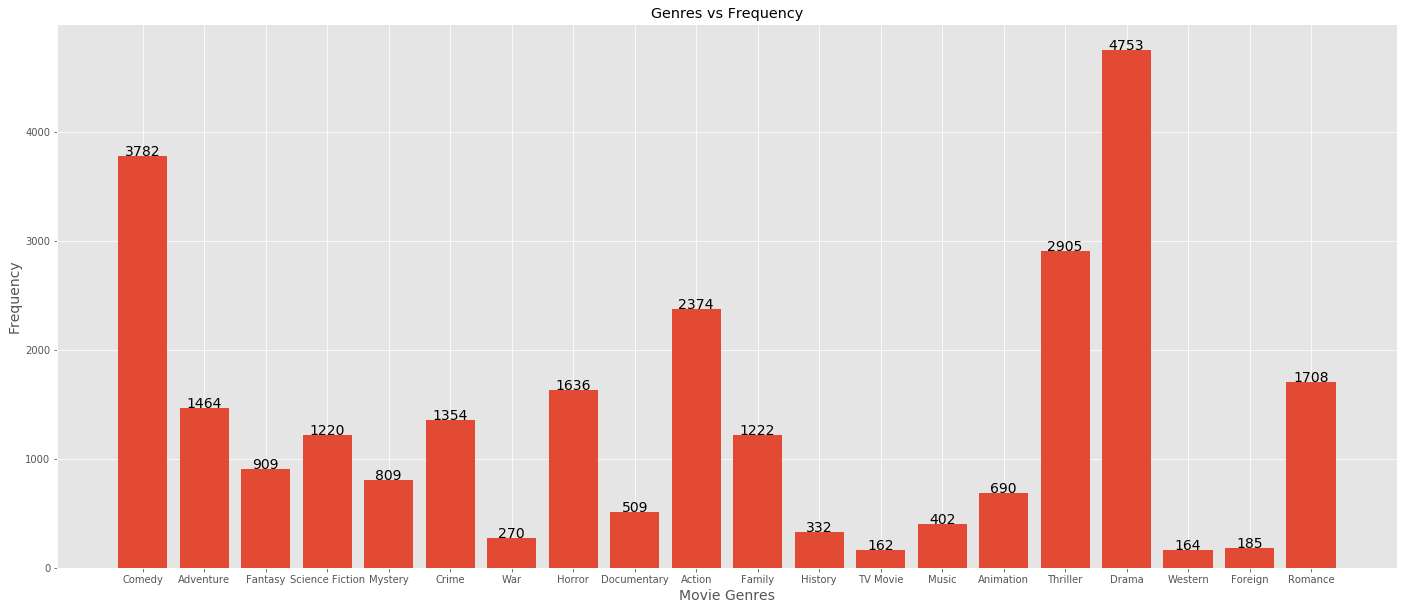

In [20]:
plt.style.use('ggplot')

plt.figure(figsize=(24,10))
plt.xlabel("Movie Genres", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Genres vs Frequency")
plt.bar(keyword_occurences.keys(), keyword_occurences.values());

for a,b in zip(keyword_occurences.keys(), keyword_occurences.values()):
    plt.text(a, b, str(b), horizontalalignment='center', fontsize=14)

    
plt.show()

So From the above graph, the top 5 most popular movie genres throughout the dataset are as follows:
 1. Drama - 4753 movies
 2. Comedy - 3782 movies
 3. Thriller - 2905 movies
 4. Action - 2374 movies
 5. Romance - 1708 movies

## Question 2: Which year has the highest number of movie releases

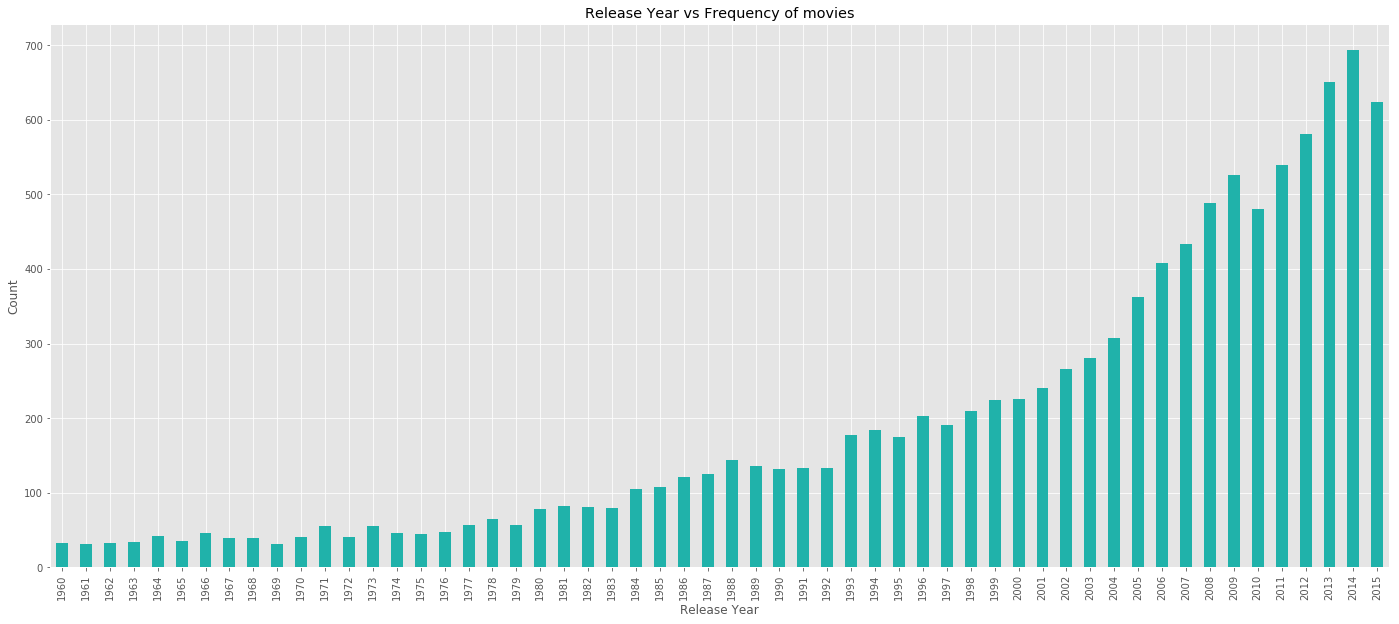

In [107]:
plt.style.use('ggplot')

movies_per_year = df_movies.groupby('release_year')['original_title'].count()
ax = movies_per_year.plot(kind='bar', figsize=(24,10), color='lightseagreen');

ax.set_xlabel("Release Year");
ax.set_ylabel("Count");
ax.set_title("Release Year vs Frequency of movies");

The above Bar Plot shows that the highest number of movies were releases in the year 2014, followed by 2013 and then 2015.

## Question 3: What is the Budget, Revenue and Profit trend throughout the years?

In [80]:
df1 = pd.Series(df_movies['budget_adj'])

df2 = pd.Series(df_movies['revenue_adj'])

profit = df2.sub(df1, fill_value=0.0)

df_movies['profit'] = profit

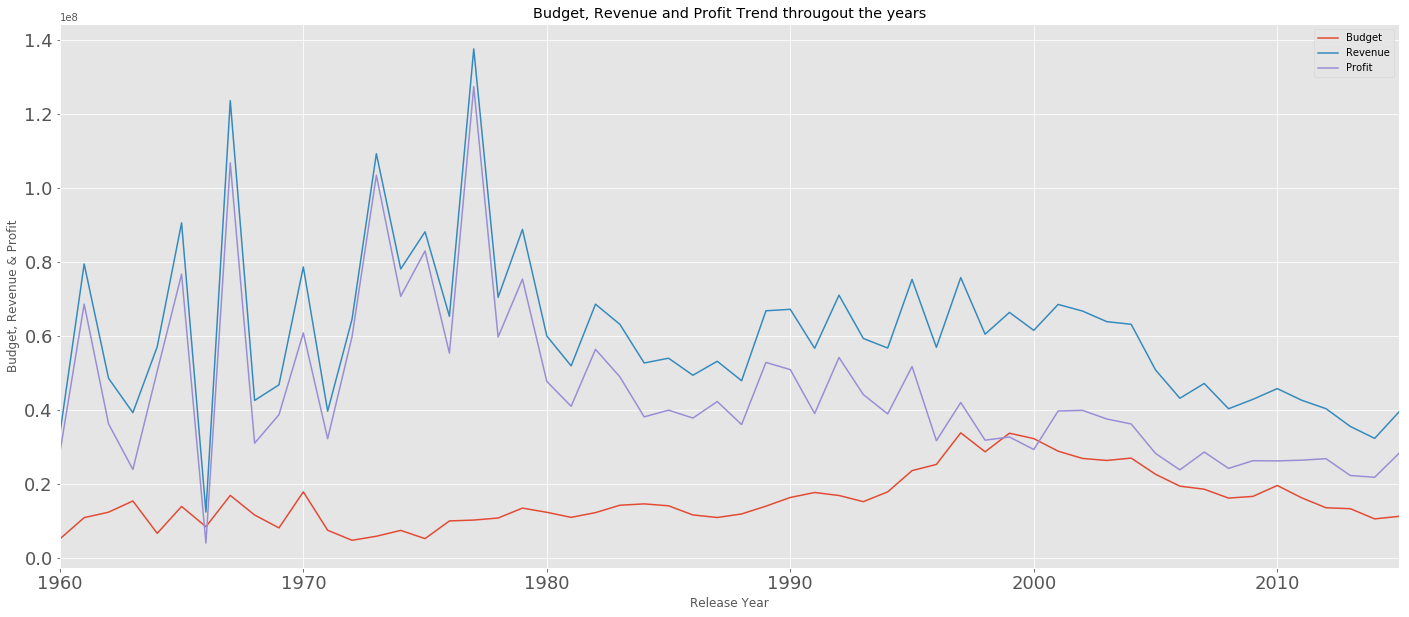

In [86]:
plt.style.use('ggplot')

trend_analysis = (df_movies[['release_year', 'budget_adj', 'revenue_adj', 'profit']].groupby('release_year').mean())

ax = trend_analysis.plot(figsize=(24,10), fontsize=18);

ax.set_xlabel("Release Year")
ax.set_ylabel("Budget, Revenue & Profit")
ax.legend(["Budget", "Revenue", "Profit"])
ax.set_title("Budget, Revenue and Profit Trend througout the years");

The above trend plot clearly shows that the all Budget, Revenue & Profit fluctuated towards the start, was constant in the middle and dropped towards the end.

## Question 4: Top 10 movies with maximum vote average,  most vote count and maximum popularity.

In [22]:
top_movies = df_movies[df_movies['vote_count']>5000][['original_title', 'revenue_adj', 'vote_count', 'release_year', 'vote_average']].sort_values('vote_average', ascending=False).head(10)
top_movies

,original_title,revenue_adj,vote_count,release_year,vote_average
4178,The Shawshank Redemption,4.169346e+07,5754,1994,8.4
4177,Pulp Fiction,3.147131e+08,5343,1994,8.1
2409,Fight Club,1.320229e+08,5923,1999,8.1
2875,The Dark Knight,1.014733e+09,8432,2008,8.1
629,Interstellar,5.726906e+08,6498,2014,8.0
4949,The Lord of the Rings: The Return of the King,1.326278e+09,5636,2003,7.9
630,Guardians of the Galaxy,7.122911e+08,5612,2014,7.9
1919,Inception,8.255000e+08,9767,2010,7.9
2633,The Lord of the Rings: The Fellowship of the Ring,1.073080e+09,6079,2001,7.8
2410,The Matrix,6.067687e+08,6351,1999,7.8


The above table represents top 10 movies of all times based on most vote counts and maximum vote average sorted according to the vote average.

In [23]:
top_movies2 = df_movies[df_movies['vote_count'].notnull()][['original_title', 'revenue_adj', 'vote_count', 'release_year', 'vote_average']].sort_values('vote_count', ascending=False).head(10)
top_movies2

,original_title,revenue_adj,vote_count,release_year,vote_average
1919,Inception,8.255000e+08,9767,2010,7.9
4361,The Avengers,1.443191e+09,8903,2012,7.3
1386,Avatar,2.827124e+09,8458,2009,7.1
2875,The Dark Knight,1.014733e+09,8432,2008,8.1
4364,Django Unchained,4.039911e+08,7375,2012,7.7
4382,The Hunger Games,6.564734e+08,7080,2012,6.7
5425,Iron Man 3,1.137692e+09,6882,2013,6.9
4363,The Dark Knight Rises,1.026713e+09,6723,2012,7.5
629,Interstellar,5.726906e+08,6498,2014,8.0
4367,The Hobbit: An Unexpected Journey,9.658933e+08,6417,2012,6.9


The above table represents top 10 movies of all times based on most vote counts and maximum vote average sorted according to the vote count.

In [24]:
top_movies3 = df_movies[df_movies['popularity'].notnull()][['original_title', 'popularity']].sort_values('popularity', ascending=False).head(10)
top_movies3

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


The above table represents top 10 movies of all times based on popularity.